### the main moto of this file is to reduce the number of features which cause the performance lagging of the machine learning model

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv(r'D:\IMP  ML  PROJECTS\CAR PRICE PREDICTION\web scraping\MUMBAI\feature engineering\cleaned_car_data_2026_mumbai.csv')

In [20]:
df.columns

Index(['Registration Year', 'Insurance', 'Fuel Type', 'Seats', 'Kms Driven',
       'Ownership', 'Engine Displacement', 'Transmission', 'Drive Type',
       'Mileage', 'Engine Type', 'Max_Power_clean', 'Max_Power_RPM',
       'Max_Torque_Nm', 'Max_Torque_RPM', 'No. of Cylinders',
       'Valves Per Cylinder', 'Fuel Supply System', 'Turbo Charger',
       'Transmission Type', 'Gearbox', 'Petrol Mileage ARAI',
       'Petrol Fuel Tank Capacity', 'Emission Norm Compliance',
       'Front Suspension', 'Rear Suspension', 'Steering Type',
       'Steering Column', 'Front Brake Type', 'Rear Brake Type', 'Length',
       'Width', 'Height', 'Ground Clearance Unladen', 'Wheel Base',
       'Gross Weight', 'Price', 'Diesel Mileage ARAI',
       'Diesel Fuel Tank Capacity', 'Top Speed', 'Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Volume'],
      dtype='object')

1. Merging the dimensions into one column

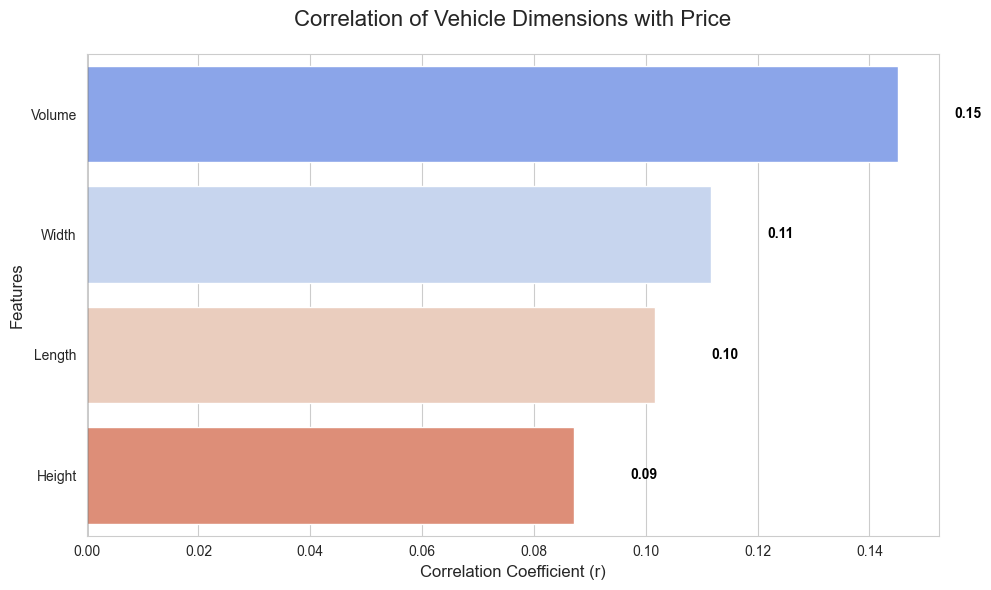

In [21]:
# Merge the ''Length', 'Width', 'Height' into one column called 'volumn'
df['Volume'] = df['Length'] * df['Width'] * df['Height']

cols_to_plot = ['Volume', 'Length', 'Width', 'Height']
correlations = df[cols_to_plot + ['Price']].corr()['Price'][cols_to_plot].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')

plt.title('Correlation of Vehicle Dimensions with Price', fontsize=16, pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add a vertical line at 0 for clarity
plt.axvline(x=0, color='black', linewidth=1)

for i, v in enumerate(correlations.values):
    ax.text(v + 0.01 if v > 0 else v - 0.05, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
df.drop(['Length', 'Width', 'Height'], axis=1, inplace=True)

2. As we have the "Engine Displacement" feature so we can skip  the "No. of cylinder" feature as they are highly correlated 

In [23]:
df.drop("No. of Cylinders", axis=1, inplace=True)

In [24]:
# Split the df over the 'Fuel_Type' column and make new dfs

for i in df['Fuel Type'].unique():
    globals()[i] = df[df['Fuel Type'] == i]

    # print the result 
    print(globals()[i].head())
    print("\n")
    

   Registration Year      Insurance Fuel Type  Seats  Kms Driven  Ownership  \
0             2022.0        Unknown    Petrol    5.0       30000          1   
2             2024.0  Comprehensive    Petrol    7.0        8000          1   
3             2024.0        Unknown    Petrol    7.0       20277          1   
4             2022.0  Comprehensive    Petrol    5.0       20000          1   
5             2023.0  Comprehensive    Petrol    5.0       27802          1   

   Engine Displacement Transmission Drive Type  Mileage  ...  \
0                  999    Automatic        FWD    17.20  ...   
2                 1451    Automatic        FWD    12.34  ...   
3                 1482    Automatic        FWD    14.70  ...   
4                  999       Manual        FWD    19.17  ...   
5                 1497    Automatic        2WD    17.70  ...   

  Diesel Fuel Tank Capacity  Top Speed  Super Charge  Battery Capacity  \
0            Not Applicable    Unknown             0              

### <span style="color: yellow;">Working over the 'globals()['Petrol]" dataset</span>

In [25]:
globals()['Petrol'].columns
print("Number of columns initially : ", len(globals()['Petrol'].columns))

Number of columns initially :  44


In [26]:
del_cols = [
    'Diesel Mileage ARAI', 'Diesel Fuel Tank Capacity', 'Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Fuel Type'
]

globals()['Petrol'] = globals()['Petrol'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['Petrol'].columns))

Number of columns after cleaning :  34


In [27]:
globals()['Petrol'].columns

Index(['Registration Year', 'Insurance', 'Seats', 'Kms Driven', 'Ownership',
       'Engine Displacement', 'Transmission', 'Drive Type', 'Mileage',
       'Engine Type', 'Max_Power_clean', 'Max_Power_RPM', 'Max_Torque_Nm',
       'Max_Torque_RPM', 'Valves Per Cylinder', 'Fuel Supply System',
       'Turbo Charger', 'Transmission Type', 'Gearbox', 'Petrol Mileage ARAI',
       'Petrol Fuel Tank Capacity', 'Emission Norm Compliance',
       'Front Suspension', 'Rear Suspension', 'Steering Type',
       'Steering Column', 'Front Brake Type', 'Rear Brake Type',
       'Ground Clearance Unladen', 'Wheel Base', 'Gross Weight', 'Price',
       'Top Speed', 'Volume'],
      dtype='object')

In [28]:
# Save the df to a new csv file
globals()['Petrol'].to_csv('cleaned_car_data_Petrol.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['Diesel']" dataset</span>

In [29]:
del_cols = [
    'Petrol Mileage ARAI', 'Petrol Fuel Tank Capacity','Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Fuel Type'
]
globals()['Diesel'] = globals()['Diesel'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['Diesel'].columns))

Number of columns after cleaning :  34


In [30]:
# Save the df to a new csv file
globals()['Diesel'].to_csv('cleaned_car_data_Diesel.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['CNG'] dataset</span>

In [31]:
del_cols = [
    'Battery Capacity', 'Charging Time DC', 'Charging Time AC', 
    'Motor Type', 'Battery Type', 'Charging Port',
    'Diesel Mileage ARAI', 'Diesel Fuel Tank Capacity', 
    'Petrol Mileage ARAI', 'Petrol Fuel Tank Capacity',
    'Super Charge', 'Turbo Charger', 'Fuel Supply System'
]
globals()['CNG'] = globals()['CNG'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['CNG'].columns))

Number of columns after cleaning :  31


In [32]:
# Save the df to a new csv file
globals()['CNG'].to_csv('cleaned_car_data_CNG.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['Electric'] dataset</span>

In [33]:
globals()['Electric'].shape[0]

41

In [34]:
del_cols = [
    'Engine Displacement', 'Valves Per Cylinder', 
    'Engine Type', 'Fuel Supply System', 'Turbo Charger', 'Super Charge',
    'Emission Norm Compliance', 'Petrol Fuel Tank Capacity', 
    'Diesel Fuel Tank Capacity', 'Petrol Mileage ARAI', 'Diesel Mileage ARAI',
    'Gearbox'
]
globals()['Electric'] = globals()['Electric'].drop(del_cols, axis=1)
print(f"EV Data Cleaned! Remaining features: {len(globals()['Electric'].columns)}")

EV Data Cleaned! Remaining features: 32


In [35]:
# Save the df to a new csv file
globals()['Electric'].to_csv('cleaned_car_data_electric.csv', index=False)